# Hierarchical Clustering - Agglomerative

### Importing Libraries

In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])

In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

### Generating random data

In [4]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

### Scatter plot of the data

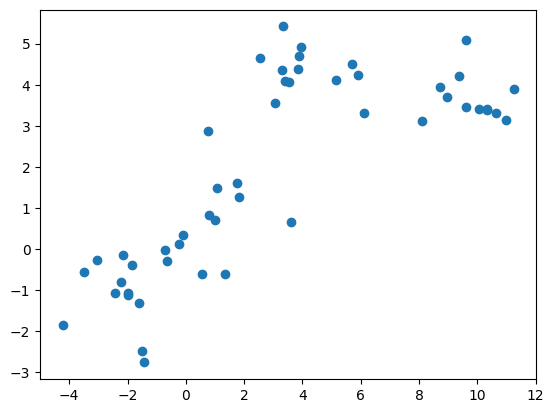

In [5]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

### Agglomerative clustering

In [6]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

### Fitting the model

In [7]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

### Creating figure size

In [8]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

### Creating the minimum and maximum range

In [9]:
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

### Getting Average distance

In [10]:
X1 = (X1 - x_min) / (x_max - x_min)

### Original data before Clustering

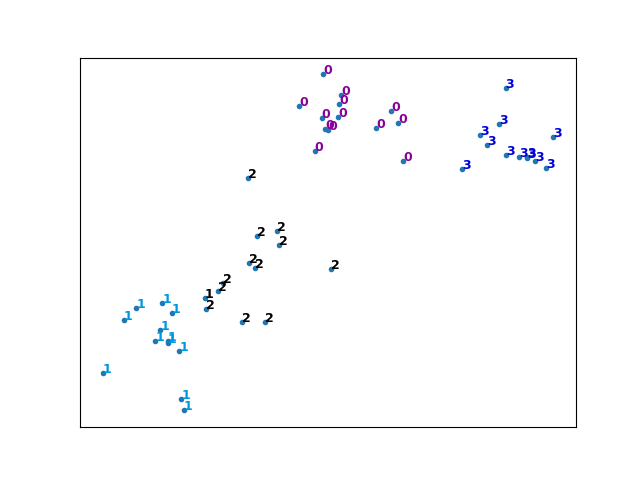

<Figure size 640x480 with 0 Axes>

In [15]:
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xticks([])
plt.yticks([])

plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

### Dendogram for Agglormerative Hierarchical Clustering

In [16]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.51489855 0.50392223 ... 0.2434895  0.34864246 0.66333642]
 [0.51489855 0.         0.11524415 ... 0.74594617 0.74721032 0.17421028]
 [0.50392223 0.11524415 0.         ... 0.74522903 0.77992563 0.16439882]
 ...
 [0.2434895  0.74594617 0.74522903 ... 0.         0.22179775 0.90201534]
 [0.34864246 0.74721032 0.77992563 ... 0.22179775 0.         0.91826203]
 [0.66333642 0.17421028 0.16439882 ... 0.90201534 0.91826203 0.        ]]


In [17]:
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-17-3814b774a052>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


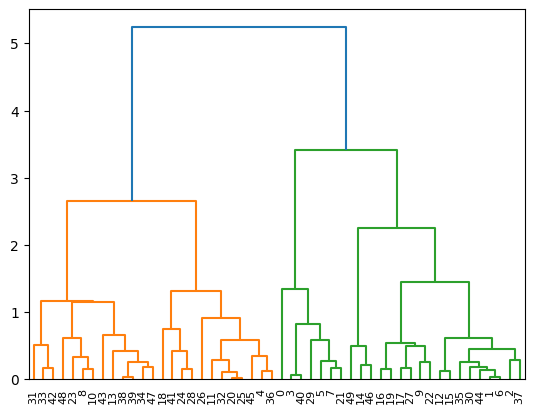

In [18]:
dendro = hierarchy.dendrogram(Z)